In [1]:
import stan
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
# this is a work around needed to run pystan in some machines
import nest_asyncio
nest_asyncio.apply()

### Create fake data

In [37]:
mu = 5
sigma = 3
np.random.seed(0)
data = np.random.normal(mu,sigma,200)

### STAN model

In [38]:
my_model = """
data {
 int <lower=0> N; // length of data
 vector[N] measurements; // data
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  mu ~ normal(0,10);   // define prior for mu (not needed, but prior info is always good)
  sigma ~ cauchy(0,1);  // define prior for sigma (idem)
  for (n in 1:N) {
  measurements[n] ~ normal(mu, sigma);  
}
}
"""

### Infer

In [39]:
my_data = {'N': len(data), 'measurements': data }

In [40]:
model = stan.build(my_model, data=my_data, random_seed=10);

Building: found in cache, done.


In [41]:
fit = model.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!


### Assessment

In [42]:
df = fit.to_frame() 
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma
draws,,,,,,,,,
0,-325.637334,0.862713,0.810680,1.0,3.0,0.0,327.454687,5.308812,2.962025
1,-325.400525,0.983008,0.865229,1.0,3.0,0.0,326.415081,5.246533,3.115726
2,-326.946710,0.919872,0.820448,3.0,7.0,0.0,330.651773,5.078527,2.818869
3,-325.681164,1.000000,0.961095,2.0,3.0,0.0,325.746244,5.037253,3.018539
4,-325.558798,0.997388,0.810680,2.0,3.0,0.0,325.815861,5.186868,3.165885
...,...,...,...,...,...,...,...,...,...
3995,-327.249999,1.000000,0.961095,2.0,7.0,0.0,328.630983,4.896449,3.290092
3996,-326.969203,0.792725,0.810680,3.0,7.0,0.0,329.242315,5.339431,2.816257
3997,-326.301699,0.996904,0.865229,2.0,3.0,0.0,326.575919,5.494617,2.996659


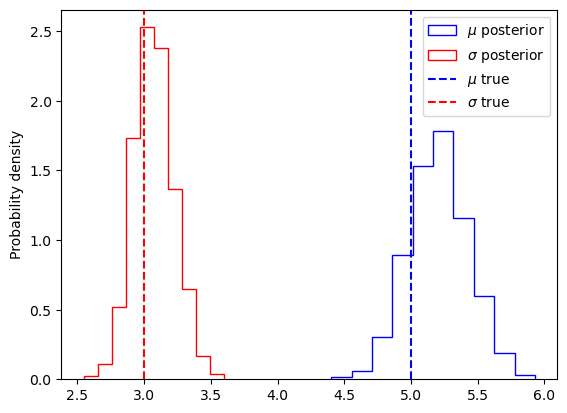

In [43]:
plt.hist(df['mu'], color='blue',  histtype='step', density=1, label='$\mu$ posterior')
plt.hist(df['sigma'], color='red', histtype='step', density=1, label='$\sigma$ posterior')
plt.axvline(mu, color='blue', linestyle='dashed', label='$\mu$ true')
plt.axvline(sigma, color='red', linestyle='dashed', label='$\sigma$ true')
plt.ylabel('Probability density')
plt.legend()
plt.show()